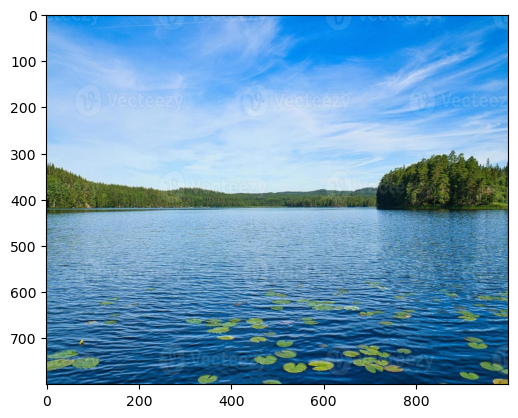

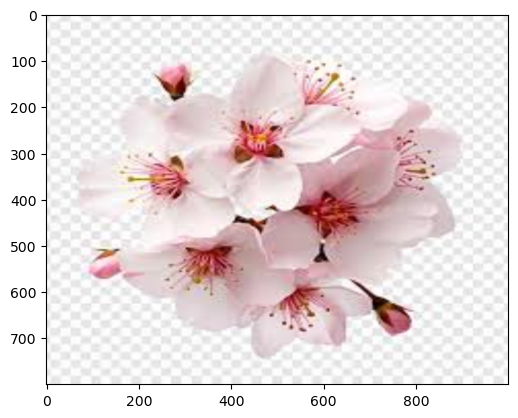

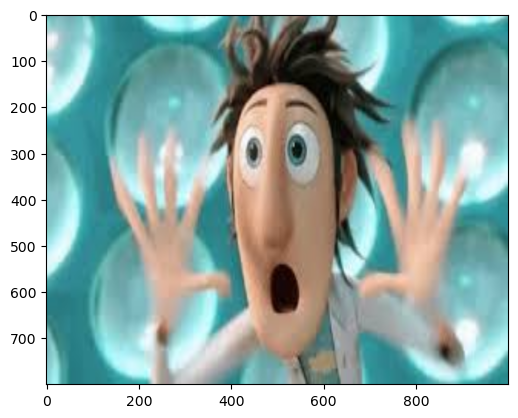

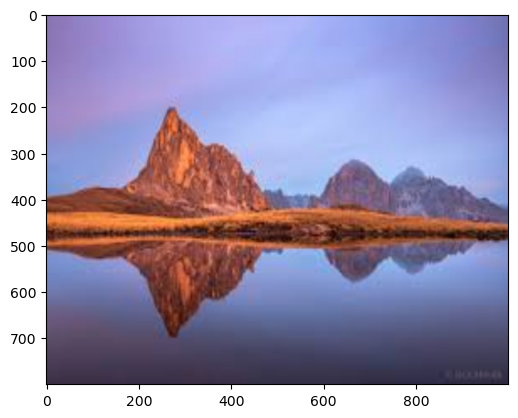

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import os
image1 = cv2.imread('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem4/ADA/img1.jpeg')
image2 = cv2.imread('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem4/ADA/png.png')
image3 = cv2.imread('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem4/ADA/gif.gif')
image4 = cv2.imread('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem4/ADA/webp.webp')
image1=cv2.cvtColor(image1, cv2.COLOR_BGR2RGB) 
image2=cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3=cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4=cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
image1=cv2.resize(image1, (1000, 800))
image2=cv2.resize(image2, (1000, 800))
image3=cv2.resize(image3, (1000, 800))
image4=cv2.resize(image4, (1000, 800))
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()
plt.imshow(image3)
plt.show()
plt.imshow(image4)

In [9]:
cv2.imwrite('compressed_jpeg.jpeg',image1,[cv2.IMWRITE_JPEG_QUALITY,50]) #lossy
cv2.imwrite('compressed_png.png',image1,[cv2.IMWRITE_PNG_COMPRESSION,3]) #lossless
compressed_jpeg=cv2.imread('compressed_jpeg.jpeg')
compressed_png=cv2.imread('compressed_png.png')
OG=os.path.getsize('./img1.jpeg')/1024
lossy=os.path.getsize('./compressed_jpeg.jpeg')/1024
lossless=os.path.getsize('./compressed_png.png')/1024
print('Original Size:',OG)
print('Lossy JPEG size:',lossy)
print('Lossless PNG size:',lossless)

Original Size: 235.822265625
Lossy JPEG size: 89.0439453125
Lossless PNG size: 1204.3173828125


In [10]:
compression_ratio_lossless=OG/lossless
compression_ratio_lossy=OG/lossy
pixels=image1.shape[0]*image1.shape[1]
bitrate_lossless=(lossless*8)/pixels
bitrate_lossy=(lossy*8)/pixels
print('Compression Ratio for Lossless:',compression_ratio_lossless)
print('Compression Ratio for Lossy:',compression_ratio_lossy)
print('Bitrate for lossless:',bitrate_lossless)
print('Bitrate for lossy:',bitrate_lossy)

Compression Ratio for Lossless: 0.1958140511716878
Compression Ratio for Lossy: 2.6483806933462013
Bitrate for lossless: 0.012043173828125
Bitrate for lossy: 0.000890439453125


In [11]:
cv2.imwrite('compressed_jpeg.jpeg',image2,[cv2.IMWRITE_JPEG_QUALITY,50]) #lossy
cv2.imwrite('compressed_png.png',image2,[cv2.IMWRITE_PNG_COMPRESSION,3]) #lossless
compressed_jpeg=cv2.imread('compressed_jpeg.jpeg')
compressed_png=cv2.imread('compressed_png.png')
OG=os.path.getsize('./png.png')/1024
lossy=os.path.getsize('./compressed_jpeg.jpeg')/1024
lossless=os.path.getsize('./compressed_png.png')/1024
print('Original Size:',OG)
print('Lossy JPEG size:',lossy)
print('Lossless PNG size:',lossless)

Original Size: 8.50390625
Lossy JPEG size: 44.3818359375
Lossless PNG size: 641.1142578125


In [13]:
compression_ratio_lossless=OG/lossless
compression_ratio_lossy=OG/lossy
pixels=image2.shape[0]*image2.shape[1]
bitrate_lossless=(lossless*8)/pixels
bitrate_lossy=(lossy*8)/pixels
print('Compression Ratio for Lossless:',compression_ratio_lossless)
print('Compression Ratio for Lossy:',compression_ratio_lossy)
print('Bitrate for lossless:',bitrate_lossless)
print('Bitrate for lossy:',bitrate_lossy)

Compression Ratio for Lossless: 0.0132642600696724
Compression Ratio for Lossy: 0.19160780689594473
Bitrate for lossless: 0.006411142578125
Bitrate for lossy: 0.000443818359375


higher Compression ratio indicates greater file size reduction.
lower bitrate indicates more aggressive compression but can imply potential loss in quality for lossy compression methods


### Peak signal to noise ratio
higher PSNR value indicate better quality of the compressed image as they correspond to lower error

In [18]:
from skimage.metrics import peak_signal_noise_ratio as psnr
psnr_lossless=psnr(image2,compressed_png)
psnr_lossy=psnr(image2,compressed_jpeg)
print('PSNR lossless:',psnr_lossless)
print('PSNR lossy:',psnr_lossy)

PSNR lossless: inf
PSNR lossy: 41.85651686346279


### Structural Similarity Index Measure
SSIM values range from -1 to 1, with 1 indicating perfect similarity between the original and compressed image

In [23]:
from skimage.metrics import structural_similarity as ssim
ssim_lossless=ssim(image2,compressed_png,multichannel=True, win_size=3)
ssim_lossy=ssim(image2,compressed_jpeg,multichannel=True, win_size=3)
print('SSIM lossless:',ssim_lossless)
print('SSIM Lossy:',ssim_lossy)

SSIM lossless: 1.0
SSIM Lossy: 0.9816671273550154
